<a href="https://colab.research.google.com/github/barauna-lo/Computational_Statistics/blob/main/HandsOn_03/CAP417_HandsOn_03_Aurelienne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CAP417 - Computational Statistics - 2022** 

**Class 6 - Exercises**

Aurelienne A. S. Jorge

---

# 1. Sample X Population

## Combination


When extracting a sample of $s$ elements from a population with $p$ elements, the total number of possible combinations is given by:

$C_{p,s} = \frac{p!}{s!(p-s)!}$

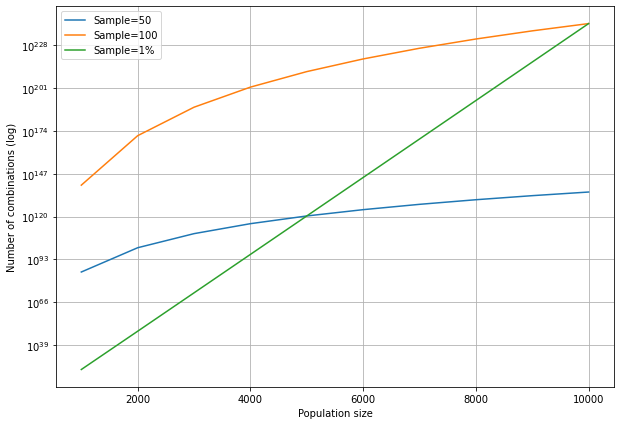

In [ ]:
import numpy as np
import math
from matplotlib import pyplot as plt

def get_num_comb(p_size, s_size):
  return math.factorial(p_size)/(math.factorial(s_size)*math.factorial(p_size-s_size))

p_sizes = np.arange(1000, 11000, 1000)
c_1 = []
c_2 = []
c_3 = []
for p_size in p_sizes:
  c_1.append(get_num_comb(p_size, s_size=50))
  c_2.append(get_num_comb(p_size, s_size=100))
  c_3.append(get_num_comb(p_size, s_size=0.01*p_size))

plt.figure(figsize=(10, 7))
plt.plot(p_sizes, c_1, label='Sample=50')
plt.plot(p_sizes, c_2, label='Sample=100')
plt.plot(p_sizes, c_3, label='Sample=1%')
plt.xlabel('Population size')
plt.ylabel('Number of combinations (log)')
plt.yscale('log')
plt.grid()
plt.legend()
plt.show()

## Average and Standard Deviation Distributions

P = Population

S = Sample

N = Total Number of Combinations

n = Number of selected samples

In [ ]:
import itertools
import sys

p_size = 30
s_size = 5
p = np.random.randint(0, 10000, p_size)
N = get_num_comb(p_size, s_size) # Total number of combinations
print("len(P) = "+str(p_size))
print("len(S) = "+str(s_size))
print("N (Total number of combinations) = "+str(N))
print("<P> = "+str(np.mean(p)))
print("std(P) = "+str(np.std(p)))

# Get all possible combinations of samples
s_list = list(itertools.combinations(p, s_size))

avg = []
std = []

n_percs = [0.3, 0.4, 0.5, 0.7, 0.9, 0.95, 0.97, 0.99]
n_values = []
for n_perc in n_percs:
  n_values.append(np.trunc(n_perc*N))

n = np.trunc(0.6*N)
i = 0
avg_avgs = []
avg_stds = []
for s in s_list:
  avg.append(np.mean(s))
  std.append(np.std(s))
  i = i + 1
  if i in n_values:
    avg_avgs.append(np.mean(avg))
    avg_stds.append(np.mean(avg))
  #  break

s_mean = np.mean(avg)
s_std = np.mean(std)
print("<avg(S)> = "+str(s_mean))
print("<std(S)> = "+str(s_std))
print("")

plt.figure(figsize=(10, 7))
plt.title('Difference between <P> and <S>')
plt.ylabel('Difference')
plt.xlabel('Percentage of samples')
plt.plot(n_percs, avg_avgs-np.mean(p))
plt.axhline(0, linestyle='--', alpha=0.6)
plt.grid()
plt.show()

# Histograms
binwidth=100
plt.figure(figsize=(10, 7))
plt.title('Average and Standard Deviation of all possible samples')
plt.hist(avg, alpha=0.5, rwidth=0.85, bins=np.arange(min(avg), max(avg) + binwidth, binwidth), label='Average')
plt.hist(std, alpha=0.5, rwidth=0.85, bins=np.arange(min(avg), max(avg) + binwidth, binwidth), label='Standard Deviation', color='red')
plt.axvline(s_mean)
plt.ylabel('Absolute Frequency')
plt.xlabel('Value')
plt.legend()
plt.grid(axis='y', alpha=0.7)
plt.show()

# Boxplots
plt.figure(figsize=(10, 7))
plt.title('Average and Standard Deviation of all possible samples')
plt.boxplot([avg, std])
plt.xticks([1,2],['AVG','STD'])
plt.grid(axis='y', alpha=0.7)
plt.show()

NameError: ignored

# Problem Example

"Uma amostra de 25 adultos do sexo masculino em uma cidade mostrou que o nível de colesterol tem média 186 e desvio padrão 12. Considerando que nessa cidade o nível de colesterol da população de adultos do sexo masculino segue uma normal, obter o intervalo de confiança de 95% para a média."

### Using a Random Normal Distribution and Percentiles

In [ ]:
s_size = 25
avg = 186
std = 12
n = 10000    # Number of samples
perc1 = []
perc2 = []
s_avg = []
s_std = []
for i in range(n):
  dist = np.random.normal(loc=avg, scale=std, size=s_size)
  s_avg.append(np.mean(dist))
  s_std.append(np.std(dist))
  percs = np.percentile(dist, [2.5, 97.5])
  perc1.append(percs[0])
  perc2.append(percs[1])
print("Mean: "+str(np.mean(s_avg)))
print("Confidence Interval: [" + str(np.mean(perc1)) + ", " + str(np.mean(perc2)) + "]")

Mean: 186.01479399153098
Confidence Interval: [165.61816000677635, 206.41081112104783]


In [ ]:
from scipy import stats

s_size = 25000
avg = 186
std = 12
perc1 = []
perc2 = []
dist = np.random.normal(loc=avg, scale=std, size=s_size)
ci_start, ci_end = np.percentile(dist, [2.5, 97.5])
print("Mean: "+str(np.mean(dist)))
print("Confidence Interval: [" + str(ci_start) + ", " + str(ci_end) + "]")
print("")

binwidth=1
plt.figure(figsize=(10, 7))
plt.title("Hostogram and Confidence Interval (95%)")
plt.hist(dist, bins=np.arange(min(dist), max(dist) + binwidth, binwidth), label="Histogram")
plt.xlabel("Values")
plt.ylabel("Absolute Frequency")
plt.axvline(np.mean(dist), label='Mean', color='grey')
plt.axvline(ci_start, label='2.5° Percentile', color='orange')
plt.axvline(ci_end, label='97.5° Percentile', color='r')
plt.text(180,500,'95% C.I.', fontsize='xx-large')
plt.legend()
plt.show()

NameError: ignored

### Using scipy.stats.t.ppf

Percent Point Function (PPF) - The inverse of the Cumulative Distribution Function, it indicates which values are included in a given probability interval.

Confidence interval: [-2.063898561628021, 2.0638985616280205]



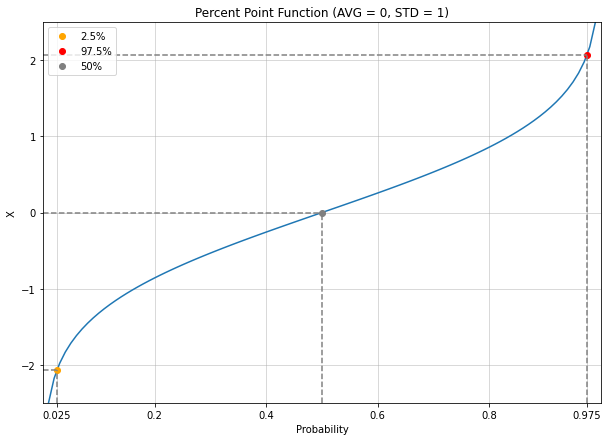

In [ ]:
s_size = 25
#avg=0
#std=1
ci_start = stats.t.ppf(.025, df=24, loc=avg, scale=std)
ci_end = stats.t.ppf(.975, df=24, loc=avg, scale=std)
print("Confidence interval: [" + str(ci_start) + ", " + str(ci_end) + "]")
print("")

x = np.arange(0.01, 1, 0.01)
vals = stats.t.ppf(x, df=s_size-1, loc=avg, scale=std)
plt.figure(figsize=(10, 7))
plt.plot(x, vals)
plt.plot(0.025,ci_start, 'o', color='orange', label='2.5%')
plt.plot(0.975,ci_end, 'o', color='red', label='97.5%')
plt.plot(0.5,avg, 'o', color='grey', label='50%')

# Auxiliary lines
plt.axhline(y=ci_start, xmin=0, xmax=0.025, linestyle='--', color='grey')
plt.axhline(y=ci_end, xmin=0, xmax=0.975, linestyle='--', color='grey')
plt.axhline(y=avg, xmin=0, xmax=0.5, linestyle='--', color='grey')
ymax1=(ci_start-np.min(vals))/(np.max(vals)-np.min(vals))
ymax2=(ci_end-np.min(vals))/(np.max(vals)-np.min(vals))
ymax3=(avg-np.min(vals))/(np.max(vals)-np.min(vals))
plt.axvline(x=0.025, ymin=0, ymax=ymax1, linestyle='--', color='grey')
plt.axvline(x=0.975, ymin=0, ymax=ymax2, linestyle='--', color='grey')
plt.axvline(x=0.5, ymin=0, ymax=ymax3, linestyle='--', color='grey')

plt.title('Percent Point Function (AVG = '+str(avg)+', STD = '+str(std)+')')
plt.xlabel('Probability')
plt.ylabel('X')
plt.grid(alpha=0.6)
plt.xlim(0,1)
plt.ylim(np.min(vals), np.max(vals))
plt.xticks([0.025, 0.2, 0.4, 0.6, 0.8, 0.975], [0.025, 0.2, 0.4, 0.6, 0.8, 0.975])
plt.legend()
plt.show()